In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurancecsv/insurance_data.csv


In [2]:
import sys
import matplotlib

In [3]:
#creating some input and output values
inputs = [1,2,3]
weights = [0.2,0.8,-0.5]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias

print(output)


2.3


In [4]:
#creating some input and output values
inputs = [1,2,3,2.5]
weights1 = [0.2,0.8,-0.5,1.0]
weights2 = [0.5,-0.91,0.26,-0.5]
weights3 = [-0.26,-0.27,0.17,0.87]
bias1 = 2
bias2 = 3
bias3 = 0.5

output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3]  + bias1,
         inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3]  + bias2,
         inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3]  + bias3]

print(output)


[4.8, 1.21, 2.385]


In [5]:
#putiing it in dynamic way


inputs = [1,2,3,2.5]

weights = [[0.2,0.8,-0.5,1.0],
          [0.5,-0.91,0.26,-0.5],
          [-0.26,-0.27,0.17,0.87]]


biases = [2, 3, 0.5]

layes_outputs = []

for neuron_weights, neuron_bias in zip(weights,biases):
    
    neuron_output  = 0
    
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    neuron_output+=  neuron_bias
    
    layes_outputs.append(neuron_output)
    
print(layes_outputs)    
        
        
        

[4.8, 1.21, 2.385]


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [7]:
data = pd.read_csv('/kaggle/input/insurancecsv/insurance_data.csv')

In [8]:
data.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [9]:
data.shape

(28, 3)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['age','affordibility']], data.bought_insurance, test_size =0.2, random_state =202)

In [11]:
len(X_train)

22

In [12]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100


In [13]:
model = keras.Sequential([keras.layers.Dense(1,input_shape = (2,), activation ='sigmoid', kernel_initializer = 'ones', bias_initializer = 'zeros')])

2022-04-24 07:10:18.163024: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'] )

In [15]:
model.fit(X_train_scaled,y_train,epochs=5000,verbose=0)

2022-04-24 07:10:18.592034: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [16]:
model.predict(X_test_scaled)

array([[0.5386037 ],
       [0.44659305],
       [0.20283031],
       [0.38685343],
       [0.14192477],
       [0.55750275]], dtype=float32)

In [17]:
 model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 219ms/step - loss: 0.5082 - accuracy: 0.6667


[0.5082305073738098, 0.6666666865348816]

In [18]:
weights, bias = model.get_weights()
weights, bias

(array([[6.152812 ],
        [1.4003644]], dtype=float32),
 array([-2.9684289], dtype=float32))

In [19]:

def sigmoid(x):
    
    return 1/(1+ np.exp(-x))

sigmoid(15)
    
    

0.999999694097773

In [20]:
 def prediction_function(age,affordibility):
        
    weighted_sum = weights[0]*age + weights[1]*affordibility + bias 
    
    return sigmoid(weighted_sum)

In [21]:
prediction_function(0.47,1)

array([0.7898061], dtype=float32)

In [22]:
def mean_abs_error(y_true,y_pred):
    
    total_error = 0
    
    for yt,yp in zip(y_true,y_pred):
        
        total_error += abs(yt-yp)
    return   total_error/len(y_true)  

In [23]:
y_pred =model.predict(X_test_scaled) 

In [24]:
mean_abs_error(y_test,y_pred)

array([0.37905136], dtype=float32)

In [25]:
def mean_abs_error(y_true,y_pred):
    return np.mean(np.abs(np.array(y_true) - y_pred))
    
    
    
       

In [26]:
def mean_sqr_error(y_true,y_pred):
    return np.mean(np.square(np.array(y_true) - y_pred))

In [27]:
mean_sqr_error(y_test,y_pred)

0.16854783034672938

In [28]:
def log_loss(y_true,y_pred):
    
    eplison = 1e-15
    
    first = [max(i,eplison) for i in y_pred]
    second  = [min(i,1-eplison) for i in (1-y_pred)]
    
     
        
    
    return  -np.mean(np.array(y_true)*(np.log(first)) + (1-np.array(y_true))*(np.log(second)))
    

In [29]:

log_loss(y_test,y_pred)

0.5082305272420248

In [30]:
def gradient_descent(age,affordability,y_true,epochs):
    
    
    w1 = w2 = 1 
    
    bias = 0
    
    rate = 0.5
    
    n = len(age)
    
    for i in range(epochs):
        
        weighted_sum =w1*age + w2*affordability +  bias
        
        y_predicted = sigmoid(weighted_sum)
        
        loss = log_loss(y_true,y_predicted)
        
        dw1 = (1/n)*(np.dot())
        
    
    

In [31]:
np.dot(np.transpose(X_test['age']),(np.array(y_test) - y_pred))

array([-68.82961455, -68.82961455, -68.82961455, -68.82961455,
       -68.82961455, -68.82961455])

In [32]:
y_test.shape

(6,)

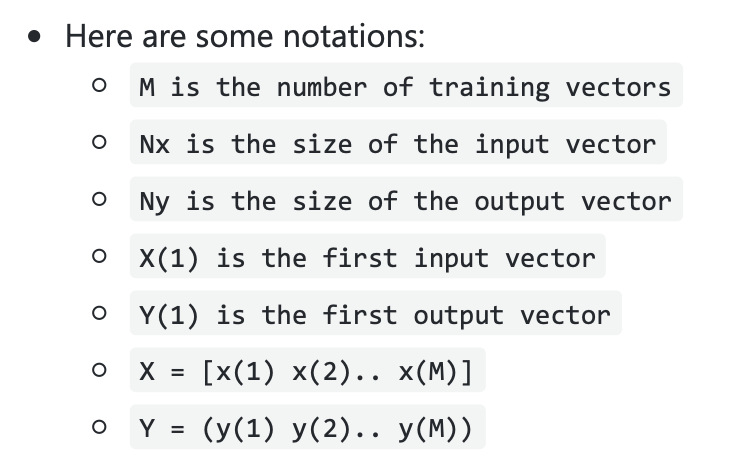


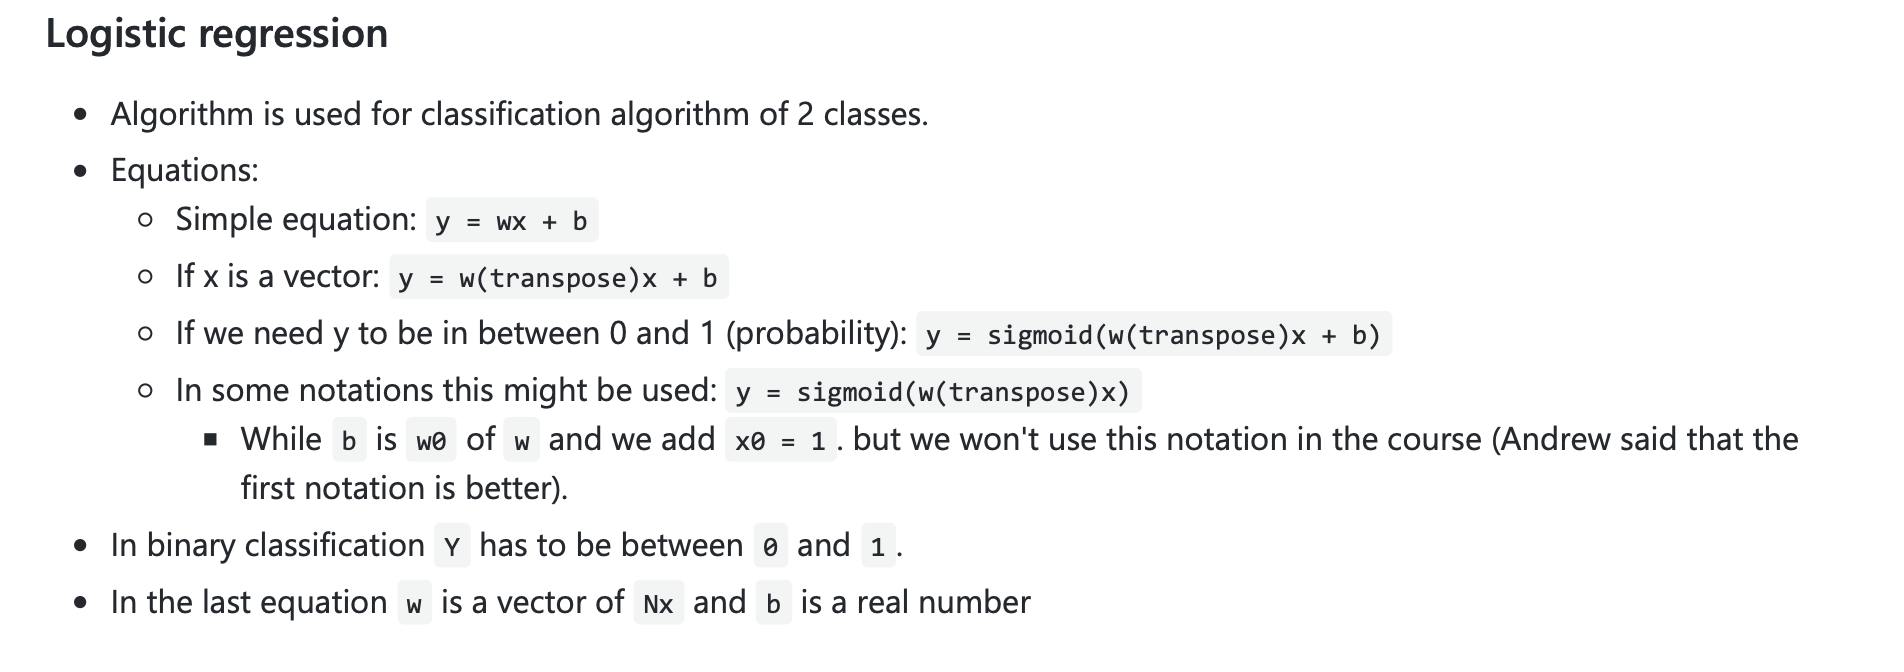

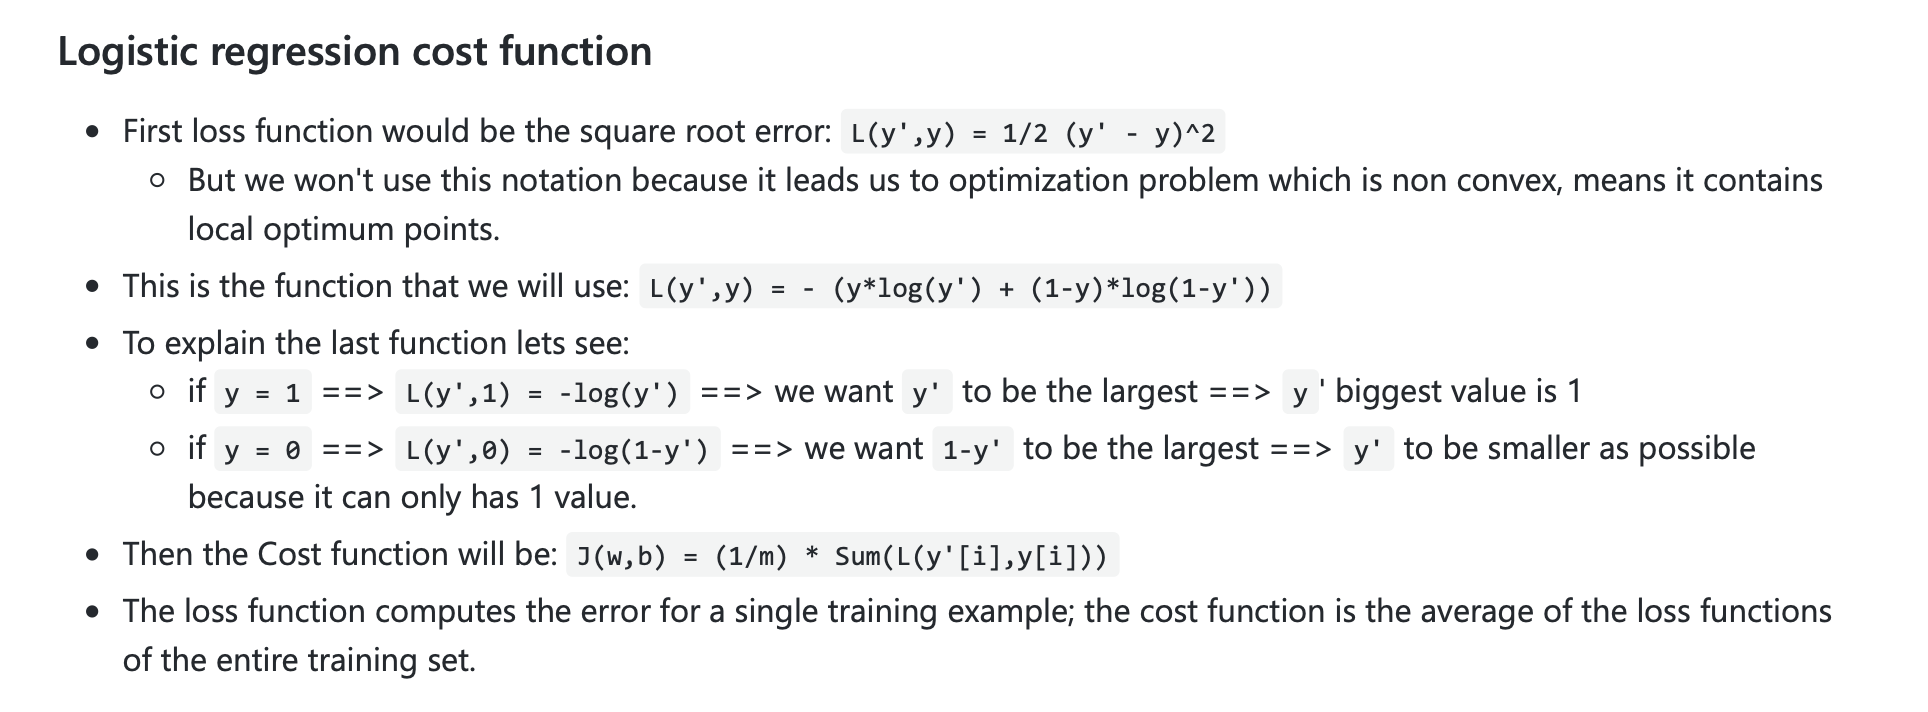

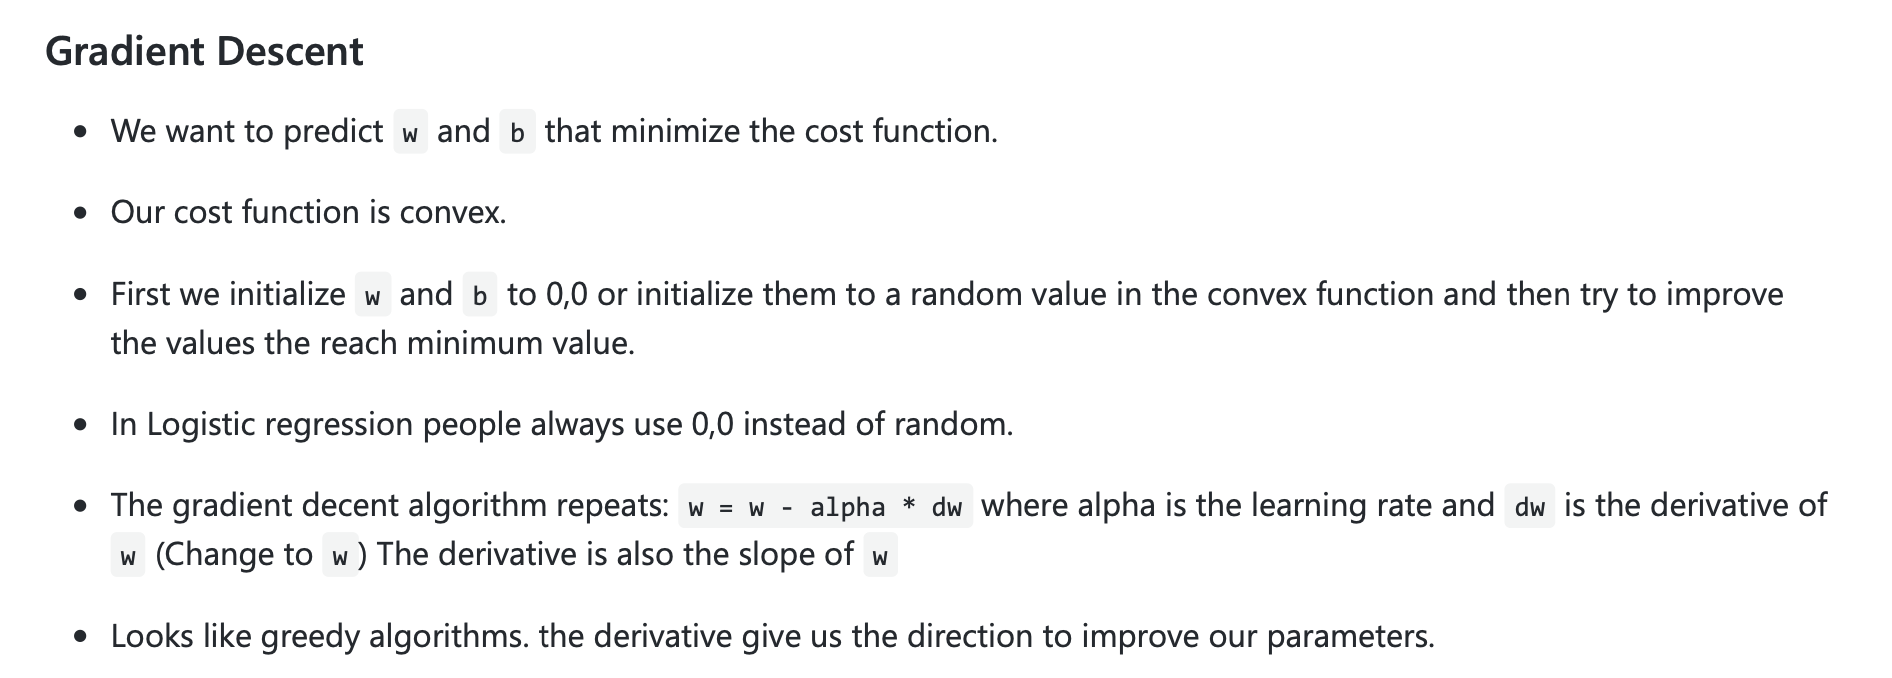
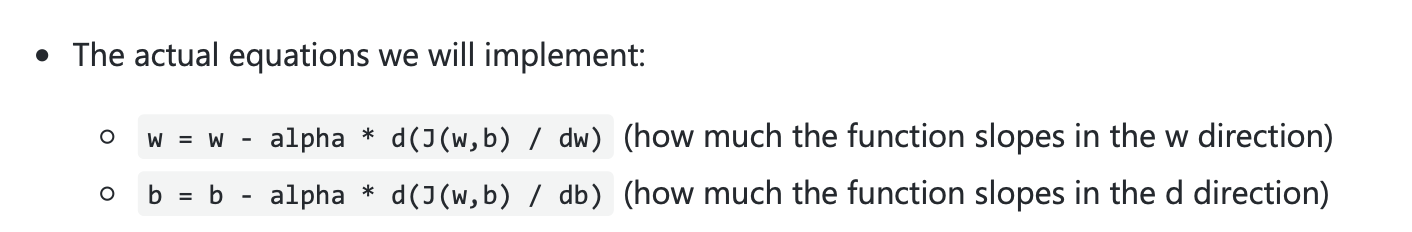